In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Single-layer perceptron
* Binary classification (-1/1), Attention: Delta rule didn't work with (0/1)

In [2]:
def plot_decision_boundary_simple(weights):
    if(weights.shape[1]==3): # with bias: w = (w1, w2, b)
        w1 = weights[0][0]
        w2 = weights[0][1]
        b = weights[0][2]
        slope = -(b/w2) / (b/w1)
        y_intercept = -b / w2
        axes = plt.gca() # Get the current Axes instance on the current figure
        x_vals = np.array(axes.get_xlim()) # get_xlim: Return the x-axis view limits
        y_vals = y_intercept + slope * x_vals
        plt.plot(x_vals, y_vals,'--',label='decision boundary with bias')
    if(weights.shape[1]==2): # without bias: w = (w1, w2)
        w1 = weights[0][0]
        w2 = weights[0][1]

def initialize_weights(dim_row, dim_col):
    W = np.random.randn(dim_row,dim_col) * 0.01
    return W

# Evaluation metrics
def ratio_misclassified_examples(W,X,Y):
    return

def mean_squared_error(W,X,Y):
    #mse = 
    #return mse
    return

### Perceptron Learning Rule
* activation function is step-function
* threshold in step-function is minus bias: -b, the last entry in weight matrix
* difference to delta rule: calculate output y = w*x, update w += (+/-) * learn_rate * x if misclassified

In [3]:
def perceptron_learning_rule(W, X, Y, learning_rate):
    patterns = X
    targets = Y
    weights = W
    
    flag = True
    while(flag): # Make sure every instance gets classified correctly: if sample gets classified wrong then flag = True, and iterate from the beginning
        flag = False
        for i in range(0,patterns.shape[1]):
            sample = patterns[:,i].reshape(patterns.shape[0],1)
            y = np.dot(weights,sample) # output: y = w*x
            
            if y < -weights[0][2]: # if y (output) is lower than threshold
                y = -1
            elif y >= -weights[0][2]: # y is higher than threshold
                y = 1

            if y == -1 and targets[0][i] == 1: 
                delta_W = learning_rate * sample.T
                weights += delta_W
                flag = True
            elif y == 1 and targets[0][i] == -1:
                delta_W = (-1) * learning_rate * sample.T
                weights += delta_W
                flag = True
        #ratio_misclassified_examples(weights, patterns, targets)
        #mean_squared_error(weights, patterns, targets)
    
    return weights

def single_layer_perceptronrule(X, Y, learning_rate=0.001, epochs=20):
    # initialize
    patterns = X # features (training)
    targets = Y # labels (training)
    
    # initialize weights
    W = initialize_weights(targets.shape[0],patterns.shape[0])
    
    print(W)
    
    # Apply perceptron_learning_rule epochs times
    #for x in range(epochs): # epoch doesn't make sense here?
    W = perceptron_learning_rule(W, patterns, targets, learning_rate)
    print(W)
    
    return W



### Delta rule
* difference to perceptron learning rule: calculate activation function only in the end

In [4]:
def delta_rule_batch(W, patterns, targets, learning_rate):
    delta_W = (-1)*learning_rate * np.dot((np.dot(W,patterns)-targets), patterns.T)
    W += delta_W
    return W

def delta_rule_sequential(W, patterns, targets, learning_rate):
    weights = W
    
    for i in range(0,patterns.shape[1]):
        sample = patterns[:,i].reshape(patterns.shape[0],1)
        target = targets[0][i]
        delta_W = (-1)*learning_rate * np.dot((np.dot(weights,sample)-target), sample.T)
        W += delta_W
        
    return weights

def single_layer_batch_deltarule(X, Y, learning_rate=0.001, epochs=20):
    # initialize
    patterns = X # features (training)
    targets = Y # labels (training)

    # initialize weights
    W = initialize_weights(targets.shape[0],patterns.shape[0])
    
    # Apply delta-rule (batch) epochs times
    for x in range(epochs):
        W = delta_rule_batch(W, patterns, targets, learning_rate)
        #ratio_misclassified_examples(W, patterns, targets)
        #mean_squared_error(W, patterns, targets)
    
    return W

def single_layer_sequential_deltarule(X, Y, learning_rate=0.001, epochs=20):
    # initialize
    patterns = X # features (training)
    targets = Y # labels (training)

    # initialize weights
    W = initialize_weights(targets.shape[0],patterns.shape[0])
    
    # Apply delta-rule (sequential) epochs times
    for x in range(epochs):
        W = delta_rule_sequential(W, patterns, targets, learning_rate)
        #ratio_misclassified_examples(W, patterns, targets)
        #mean_squared_error(W, patterns, targets)
    
    return W


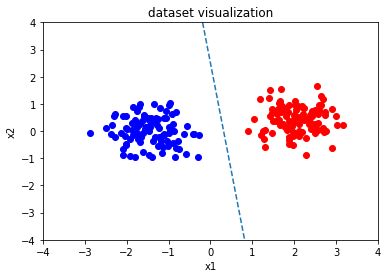

In [5]:
# 3.1.1
# Generate dataset for binary classification (linearly separable dataset)

n = 100 # number of samples
mA = (2, 0.5) # mean of class A
mB = (-1.5, 0.0)
sigmaA = 0.5 # variance of class A
sigmaB = 0.5

classA_x1 = np.squeeze(np.random.randn(1,n) * sigmaA + mA[0]) # class A: -1
classA_x2 = np.squeeze(np.random.randn(1,n) * sigmaA + mA[1])
classB_x1 = np.squeeze(np.random.randn(1,n) * sigmaB + mB[0]) # class B: 1
classB_x2 = np.squeeze(np.random.randn(1,n) * sigmaB + mB[1])

# Create matrices
classA = np.vstack((classA_x1,classA_x2))
classB = np.vstack((classB_x1,classB_x2))
X = np.concatenate((classA,classB), axis=1)
X = np.append(X, np.full(shape=(1,X.shape[1]),fill_value=1,dtype=X.dtype), axis=0) # append bias = row filled with 1

classA_y = np.full(shape=(n,),fill_value=-1)
classB_y = np.ones(n)
Y = np.concatenate((classA_y,classB_y)).reshape((1,(n*2)))

# Permute
indices = np.arange(X.shape[1])
permuted_indices = np.random.permutation(indices)
X = X.take(permuted_indices, axis=1)
Y = Y.take(permuted_indices, axis=1)
#print("X: ",X)
#print("Y: ",Y)

# 3.1.2
# Invoke single-layer perceptron-learning
#W = single_layer_perceptronrule(X, Y, learning_rate=0.001, epochs=20)

# Invoke single-layer batch delta-rule
#W = single_layer_batch_deltarule(X, Y, learning_rate=0.001, epochs=20)


# Invoke single-layer sequential delta-rule
W = single_layer_sequential_deltarule(X, Y, learning_rate=0.001, epochs=20)


# plot dataset with decision boundary
fig = plt.figure()
ax = plt.axes()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('dataset visualization')
plt.scatter(classA_x1, classA_x2, c="red")
plt.scatter(classB_x1, classB_x2, c="blue")
plot_decision_boundary_simple(W) # plot decision boundary
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


#### Classification of samples that are not linearly separable (part 1)
* create non-linearly separable dataset by yourself
* Apply and compare: perceptron learning, delta rule (batch), delta rule (sequential) similar to previous one

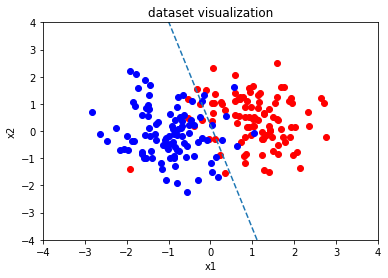

In [8]:
# 3.1.3 (part 1)
# dataset not linearly separable

n = 100 # number of samples
mA = (1, 0.5) # mean of class A
mB = (-1, 0.0)
sigmaA = 0.8 # variance of class A
sigmaB = 0.8

classA_x1 = np.squeeze(np.random.randn(1,n) * sigmaA + mA[0]) # class A: -1
classA_x2 = np.squeeze(np.random.randn(1,n) * sigmaA + mA[1])
classB_x1 = np.squeeze(np.random.randn(1,n) * sigmaB + mB[0]) # class B: 1
classB_x2 = np.squeeze(np.random.randn(1,n) * sigmaB + mB[1])

# Create matrices
classA = np.vstack((classA_x1,classA_x2))
classB = np.vstack((classB_x1,classB_x2))
X = np.concatenate((classA,classB), axis=1)
X = np.append(X, np.full(shape=(1,X.shape[1]),fill_value=1,dtype=X.dtype), axis=0) # append bias = row filled with 1

classA_y = np.full(shape=(n,),fill_value=-1)
classB_y = np.ones(n)
Y = np.concatenate((classA_y,classB_y)).reshape((1,(n*2)))

# Permute
indices = np.arange(X.shape[1])
permuted_indices = np.random.permutation(indices)
X = X.take(permuted_indices, axis=1)
Y = Y.take(permuted_indices, axis=1)
#print("X: ",X)
#print("Y: ",Y)

# Invoke single-layer perceptron-learning: !! Infinite loop since it doesn't converge !!
#W = single_layer_perceptronrule(X, Y, learning_rate=0.001, epochs=20)

# Invoke single-layer batch delta-rule
# W = single_layer_batch_deltarule(X, Y, learning_rate=0.001, epochs=20)

# Invoke single-layer sequential delta-rule
W = single_layer_sequential_deltarule(X, Y, learning_rate=0.001, epochs=20)


# plot dataset with decision boundary
fig = plt.figure()
ax = plt.axes()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('dataset visualization')
plt.scatter(classA_x1, classA_x2, c="red")
plt.scatter(classB_x1, classB_x2, c="blue")
plot_decision_boundary_simple(W) # plot decision boundary
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Classification of samples that are not linearly separable (part 2)

In [ ]:
# 3.1.3 (part 2)

### Two-layer perceptron
* trained with backprop
* generalised Delta rule, a.k.a. error backpropagation algorithm

In [ ]:
# 3.2.1


In [ ]:
# 3.2.2 The encoder problem


In [ ]:
# 3.2.3 Function approximation


### Multi-layer perceptron
* Scikit-learn library

### Backup code

In [184]:
# Neural Network model
def two_layer_model(X, Y, n_h, epochs=20):
    """
    Arguments:
    X -- dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    n_h -- size of the hidden layer
    epochs -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    # get dimensions
    n_x = X.shape[0]
    n_h = n_h # redundant
    n_y = Y.shape[0]
    
    # initialization: create W
    
    
    # 
    #for i in range(0, epochs):
        
    
    return parameters